In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("consumer_complaints.csv")

/Users/adityaasthana/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (5,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


In [4]:
disputed = df.loc[df["consumer_disputed?"].isin(["Yes"])]
print("Total number of disputed customers: ", disputed.shape[0])
not_disputed = df.loc[df["consumer_disputed?"].isin(["No"])]
print("Total number of undisputed customers: ", not_disputed.shape[0])

Total number of disputed customers:  112134
Total number of undisputed customers:  443823


<h2>Grouping the number of issues per state</h2>

In [5]:
issue_by_state = df.groupby("state")["issue"].count()
issue_state = issue_by_state.reset_index()
issue_total_state = issue_state.sort_values(by=['issue'], ascending=False)
issue_total_state.head()

,state,issue
8,CA,81700
13,FL,53673
53,TX,41352
42,NY,38266
15,GA,24548


<h2>Grouping the number of issues per product</h2>

In [6]:
issue_by_product = df.groupby("product")["issue"].count()
issue_product = issue_by_product.reset_index()
issue_total_product = issue_product.sort_values(by=['issue'], ascending=False)
issue_total_product.head()

,product,issue
6,Mortgage,186475
4,Debt collection,101052
3,Credit reporting,91854
2,Credit card,66468
0,Bank account or service,62563


<h2>Grouping of issues and products per state</h2>

In [7]:
issue_by_state_prod = df.groupby(["state", "product"])["issue"].count()
issue_state_prod = issue_by_state_prod.reset_index()
issue_total_state_prod = issue_state_prod.sort_values(by=['issue'], ascending=False)
issue_total_state_prod.head(15)

,state,product,issue
75,CA,Mortgage,32988
130,FL,Mortgage,20636
73,CA,Debt collection,13568
72,CA,Credit reporting,11965
428,NY,Mortgage,11446
540,TX,Credit reporting,11133
541,TX,Debt collection,9931
148,GA,Mortgage,9468
128,FL,Debt collection,9306
71,CA,Credit card,9078


<h2>Statewise issues with different products</h2>

In [8]:
def get_statewise_prod_issue_list(issue_total_state_prod, state_name):
    return issue_total_state_prod.loc[issue_total_state_prod["state"].isin([state_name])]

In [9]:
ca_issues = get_statewise_prod_issue_list(issue_total_state_prod, "CA")
ca_issues

,state,product,issue
75,CA,Mortgage,32988
73,CA,Debt collection,13568
72,CA,Credit reporting,11965
71,CA,Credit card,9078
69,CA,Bank account or service,8519
70,CA,Consumer Loan,2432
79,CA,Student loan,1696
74,CA,Money transfers,529
77,CA,Payday loan,513
78,CA,Prepaid card,340


In [10]:
il_issues = get_statewise_prod_issue_list(issue_total_state_prod, "IL")
il_issues

,state,product,issue
198,IL,Mortgage,6154
196,IL,Debt collection,3525
195,IL,Credit reporting,3246
192,IL,Bank account or service,2538
194,IL,Credit card,2416
202,IL,Student loan,700
193,IL,Consumer Loan,676
197,IL,Money transfers,134
200,IL,Payday loan,122
201,IL,Prepaid card,93


In [11]:
#Ideas for supervised machine learning model
#Features for model: state, issue (NLP), product, date_sent_to_company - date_recieved
#output: consumer_disputed? -> 0 = not disputed, 1 = disputed (Binary Classification)

<h2>NLP analysis of issues</h2>

In [12]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

In [13]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adityaasthana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/adityaasthana/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
#Set arbitrary english words with no impact (stopwords)
stop_words = set(stopwords.words("english"))

In [15]:
#cleaning up the writing in issues
corpus = []
errors = 0
for i,row in df.iterrows():
    text = ''
    try:   
        #remove all characters other than alphabets
        text = re.sub('[^a-zA-Z]', ' ', row['issue'])
        #Convert to lowercase    
        text = text.lower()
        #remove tags, if any (although crudely done for now)    
        text=re.sub("</?.*?>"," <> ",text)
        # remove special characters and digits    
        text=re.sub("(\\d\\W)+"," ",text)
        ##Convert to list from string    
        text = text.split()    
        ##Stemming    
        ps=PorterStemmer()
        #Lemmatisation    
        lem = WordNetLemmatizer()
        text = [lem.lemmatize(word) for word in text if not word in stop_words] 
        text = " ".join(text)
        #print(text)
        corpus.append(text)
    except TypeError as err:
        #print(err)
        errors += 1
        corpus.append(text)
        continue
print("Errors:{}".format(errors))
assert len(corpus) == len(df.index)

Errors:0


In [16]:
df['raw_text'] = corpus
df.head()
#print(len(corpus))

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id,raw_text
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074,loan modification collection foreclosure
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080,loan servicing payment escrow account
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473,incorrect information credit report
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326,repaying loan
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067,false statement representation


In [17]:
def get_corpus(complaint_id):
    '''    
    This function gets a corpus - i.e. list (collection) of all the issues from a complaint id, but in a 
    modified form (e.g. with stop words and punctuation removed.)
        
    complaint id can be a single id or -1 for all of them
    
    '''
    corpus = []
    for i,row in df.iterrows():
        if (row['complaint_id'] == complaint_id or complaint_id == -1):
            corpus.append(row['raw_text'])
    return corpus

In [26]:
def get_corpus_company(company):
    '''    
    This function gets a corpus - i.e. list (collection) of all the issues from a company, but in a 
    modified form (e.g. with stop words and punctuation removed.)
        
    company can be a the name of a company or 'all' for all of them
    
    '''
    corpus = []
    for i,row in df.iterrows():
        if (row['company'] == company or company == 'all'):
            corpus.append(row['raw_text'])
    return corpus

In [18]:
print(get_corpus(511074))

['loan modification collection foreclosure']


In [19]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
def show_words(company,filename='word1.png'):
    corpus = get_corpus_company(company)
    wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
    #print(wordcloud)
    fig = plt.figure(1)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    fig.savefig(filename, dpi=1300)

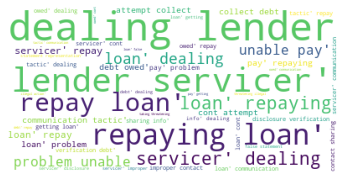

In [30]:
show_words('Navient Solutions, Inc.')

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
#print(type(cv))
#print(cv)
X=cv.fit_transform(corpus)
#print(X.shape)

In [33]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

In [34]:
#Convert most freq words to dataframe for plotting bar plot
def show_top_words(corpus):
    top_words = get_top_n_words(corpus, n=20)
    top_df = pd.DataFrame(top_words)
    top_df.columns=["Word", "Freq"]
    top_df.to_csv("single_word.csv")
    #Barplot of most freq words
    import seaborn as sns
    sns.set(rc={'figure.figsize':(13,8)})
    g = sns.barplot(x="Word", y="Freq", data=top_df)
    g.set_xticklabels(g.get_xticklabels(), rotation=30)

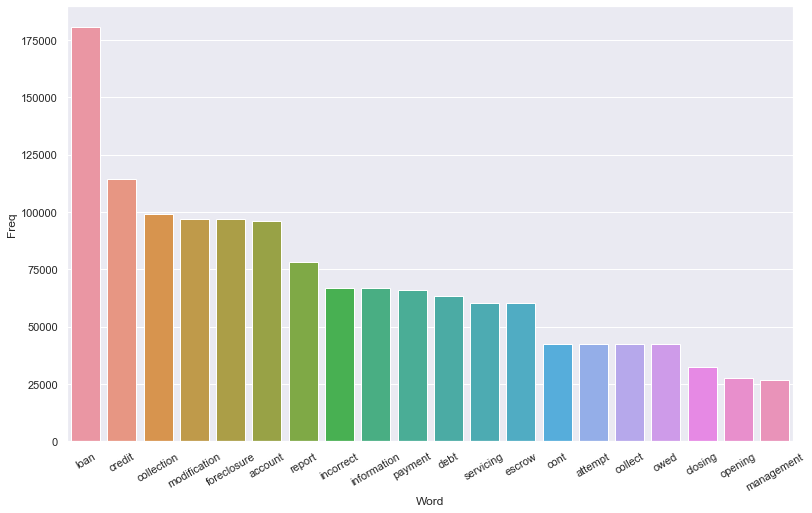

In [36]:
show_top_words(get_corpus_company('all'))

In [37]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]


In [42]:
def show_n2_words(corpus):
    top2_words = get_top_n2_words(corpus, n=20)
    top2_df = pd.DataFrame(top2_words)
    top2_df.columns=["Bi-gram", "Freq"]
    #print(top2_df)
    top2_df.to_csv("bigram.csv")
    #Barplot of most freq Bi-grams
    import seaborn as sns
    sns.set(rc={'figure.figsize':(13,8)})
    h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
    h.set_xticklabels(h.get_xticklabels(), rotation=75)

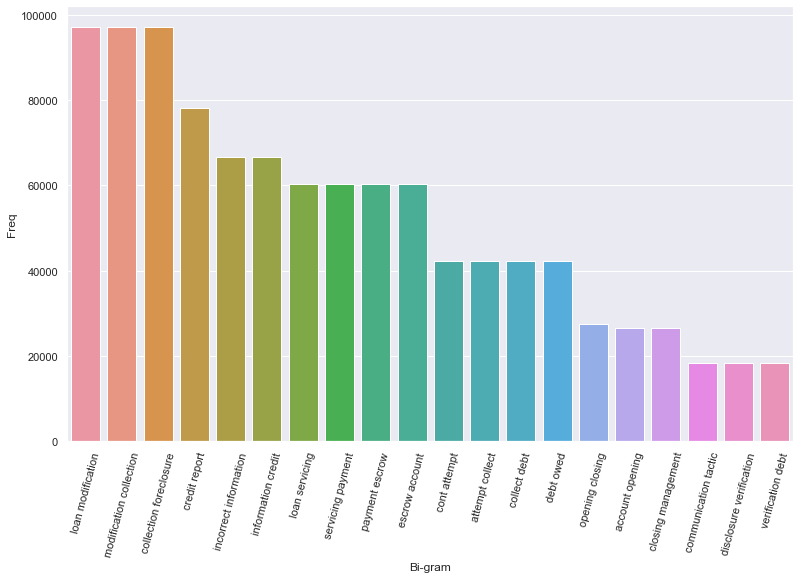

In [43]:
show_n2_words(get_corpus_company('all'))